## APLICAÇÃO KMEANS 

- Objetivo:
 Aplicar o algoritmo K-Means sobre as coordenadas das observações obtidas por meio da Análise de Correspondência Múltipla (ACM), com o objetivo de identificar agrupamentos (clusters) de clientes com perfis semelhantes, a fim de facilitar a interpretação de padrões de comportamento no marketing bancário.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('../data/processed/cord_obs.csv')
df_banking = pd.read_csv('../data/processed/bank_marketing_processed.csv')


In [12]:
# Método de Elbow para definição do melhor agrupamento
costs = []
K = range(1,40)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    costs.append(kmeans.inertia_)



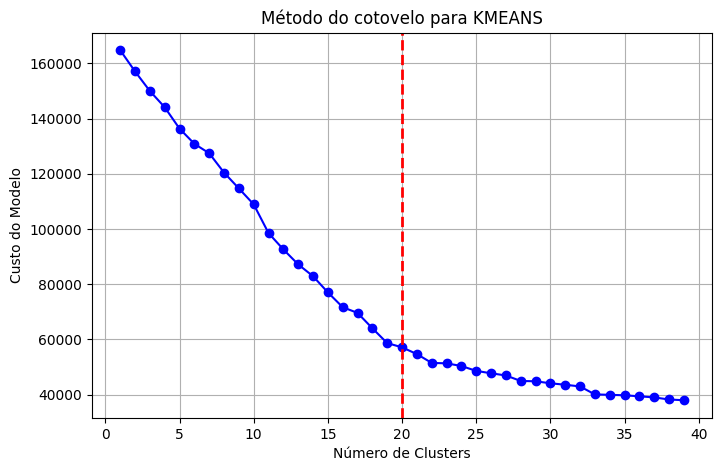

In [13]:
plt.figure(figsize=(8,5))
plt.plot(K, costs, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Custo do Modelo')
plt.title('Método do cotovelo para KMEANS')
plt.axvline(x=20, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=20, random_state=42)
clusters= kmeans.fit_predict(df)
df['cluster'] = clusters
df_banking['cluster'] = clusters

In [8]:
df_banking.head()

,age,job,marital,education,default,housing,loan,cluster
0,Adult,housemaid,married,basic,no,no,no,12
1,Adult,services,married,high school,unknown,no,no,0
2,Adult,services,married,high school,no,yes,no,0
3,Adult,admin.,married,basic,no,no,no,19
4,Adult,services,married,high school,no,no,yes,0


In [9]:
df_banking.groupby('cluster').agg(lambda x: x.value_counts().index[0])

,age,job,marital,education,default,housing,loan
cluster,,,,,,,
0,Adult,services,married,high school,no,yes,no
1,Adult,management,married,university degree,no,yes,no
2,Adult,admin.,single,university degree,no,yes,no
3,Adult,blue-collar,married,basic,no,yes,yes
4,Adult,technician,married,professional course,no,yes,no
5,Adult,blue-collar,married,basic,no,yes,no
6,Elderly,retired,married,basic,no,yes,no
7,Adult,self-employed,married,university degree,no,yes,no
8,Adult,entrepreneur,married,university degree,no,yes,no


## Conclusão
A tabela acima resume cada cluster (ou “perfil”) com as categorias mais frequentes de cada variável, permitindo traçar um perfil representativo para cada um dos 20 grupos formados. A quantidade de clusters foi definida com base no método do cotovelo, que avalia a relação entre o número de agrupamentos e o custo do modelo, buscando escolher a quantidade ideal de clusters que minimize a inércia (soma das distâncias dentro dos clusters) sem causar um excesso de complexidade.

No entanto, esse número pode ser ajustado conforme as particularidades do estudo e os objetivos da análise, pois diferentes contextos podem demandar um maior ou menor número de perfis para uma interpretação mais significativa e aplicável. Além disso, é importante considerar a qualidade dos agrupamentos, avaliando métricas como a silhueta, para garantir que os clusters formados sejam coesos internamente e bem separados entre si.